In [ ]:
!pip install matplotlib seaborn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/InfosysSB/Preprocessed_Dataset/FakeNewsNet_Preprocessed.csv')


In [ ]:
# Show the first few rows of the dataset
df.head()

,title,news_url,source_domain,tweet_num,real
0,kandi burruss explodes rape accusation on real...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,people choice award 2018 the best red carpet look,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,sophia bush sends sweet birthday message to on...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,colombian singer maluma spark rumour of inappr...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,gossip girl 10 year later upper east siders sh...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


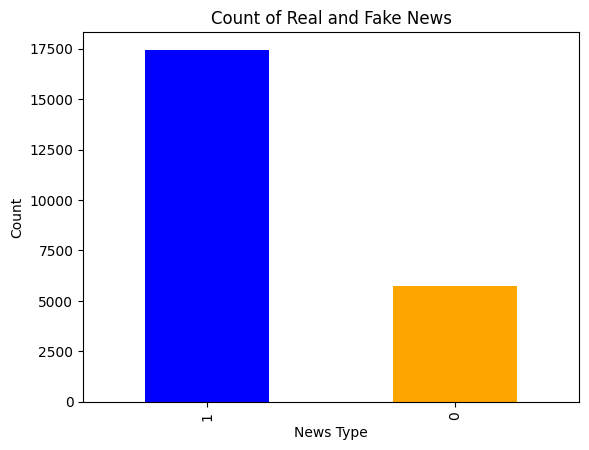

In [ ]:
# Show the count of real and fake news
df['real'].value_counts().plot(kind='bar', color=['blue', 'orange'], title='Count of Real and Fake News')
plt.xlabel('News Type')
plt.ylabel('Count')
plt.show()

In [ ]:
# Extract features and labels
X = df['title']
y = df['real']

# Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = vectorizer.fit_transform(X)

# Split data into training, testing, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.333, random_state=42)

In [ ]:
# Initialize and train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict and evaluate on validation set
y_val_pred = log_reg.predict(X_val)
print("Logistic Regression")
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred)}")
print(classification_report(y_val, y_val_pred))
print(confusion_matrix(y_val, y_val_pred))

# Predict and evaluate on test set
y_test_pred = log_reg.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))


Logistic Regression
Validation Accuracy: 0.8300258843830889
              precision    recall  f1-score   support

           0       0.77      0.44      0.56       570
           1       0.84      0.96      0.89      1748

    accuracy                           0.83      2318
   macro avg       0.81      0.70      0.73      2318
weighted avg       0.82      0.83      0.81      2318

[[ 249  321]
 [  73 1675]]
Test Accuracy: 0.8206896551724138
              precision    recall  f1-score   support

           0       0.79      0.40      0.53      1178
           1       0.83      0.96      0.89      3462

    accuracy                           0.82      4640
   macro avg       0.81      0.68      0.71      4640
weighted avg       0.82      0.82      0.80      4640

[[ 470  708]
 [ 124 3338]]


In [ ]:
# Define the grid of parameters to search through
param_grid = {
    'C': [0.1, 1.0],            # Regularization parameter
    'penalty': ['l1', 'l2'],    # Regularization type
    'solver': ['liblinear']     # Algorithm to use in optimization problem
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1, return_train_score=True)

# Perform grid search to find the best parameters
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
# Predictions using the best model
y_train_pred_best = best_model.predict(X_train)
print("Logistic Regression (Best Model) - Training Set")
print(classification_report(y_train, y_train_pred_best))
print(confusion_matrix(y_train, y_train_pred_best))

# Predictions on test set using the best model
y_test_pred_best = best_model.predict(X_test)
print("Logistic Regression (Best Model) - Test Set")
print(classification_report(y_test, y_test_pred_best))
print(confusion_matrix(y_test, y_test_pred_best))


Logistic Regression (Best Model) - Training Set
              precision    recall  f1-score   support

           0       0.89      0.52      0.65      4006
           1       0.86      0.98      0.92     12229

    accuracy                           0.86     16235
   macro avg       0.87      0.75      0.78     16235
weighted avg       0.87      0.86      0.85     16235

[[ 2072  1934]
 [  269 11960]]
Logistic Regression (Best Model) - Test Set
              precision    recall  f1-score   support

           0       0.79      0.40      0.53      1178
           1       0.83      0.96      0.89      3462

    accuracy                           0.82      4640
   macro avg       0.81      0.68      0.71      4640
weighted avg       0.82      0.82      0.80      4640

[[ 470  708]
 [ 124 3338]]


In [ ]:
# Predict custom input
custom_input = "colombian singer maluma spark rumour of inappropriate relationship with aunt"
vectorized_input = vectorizer.transform([custom_input])
prediction = best_model.predict(vectorized_input)

# Print prediction result
print("Prediction for custom input:", "Real" if prediction[0] else "Fake")


Prediction for custom input: Real


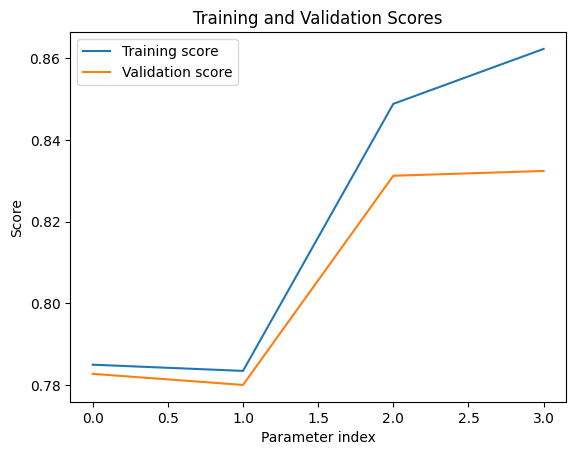

In [ ]:
# Get grid search results and plot validation scores
results = pd.DataFrame(grid_search.cv_results_)
mean_train_scores = results['mean_train_score']
mean_test_scores = results['mean_test_score']
params = range(len(mean_train_scores))

plt.plot(params, mean_train_scores, label='Training score')
plt.plot(params, mean_test_scores, label='Validation score')
plt.title('Training and Validation Scores')
plt.xlabel('Parameter index')
plt.ylabel('Score')
plt.legend()
plt.show()


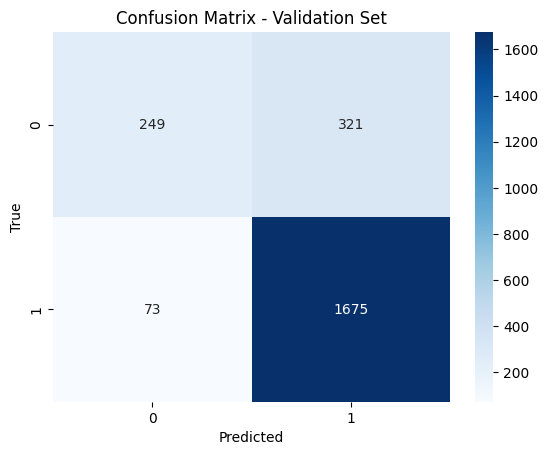

In [ ]:
# Confusion matrix for validation set
val_cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



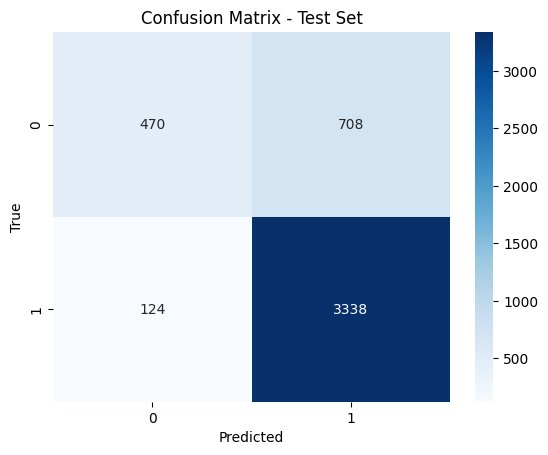

In [ ]:
# Confusion matrix for test set
test_cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()